In [1]:
path = 'data/GrowthProfilerNonParametricResults.csv'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the csv file
df=pd.read_csv(path)

# split the 'Identifier' column into new columns

# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]


# Group by Format, FlowType, and Media and calculate mean and variance of GrowthRate
summary_stats = df.groupby(['Format', 'FloVsMan', 'Media'])['GrowthRate'].agg(['mean', 'var']).reset_index()
summary_stats['std'] = np.sqrt(summary_stats['var'])

# Display the summary statistics
print(summary_stats)


   Format FloVsMan   Media      mean      var       std
0      24      flo  media1  0.360000  0.00000  0.000000
1      24      flo  media2  0.460000  0.00120  0.034641
2      24      flo  media3  0.520000  0.00480  0.069282
3      24      flo  media4  0.540000  0.00000  0.000000
4      24      man  media1  0.120000  0.00000  0.000000
5      24      man  media2  0.400000  0.00120  0.034641
6      24      man  media3  0.400000  0.00120  0.034641
7      24      man  media4  0.440000  0.00120  0.034641
8      96      flo  media1  0.260000  0.00120  0.034641
9      96      flo  media2  0.336000  0.00108  0.032863
10     96      flo  media3  0.300000  0.00000  0.000000
11     96      flo  media4  0.340000  0.00120  0.034641
12     96      man  media1  0.246667  0.01120  0.105830
13     96      man  media2  0.266667  0.00100  0.031623
14     96      man  media3  0.260000  0.00090  0.030000
15     96      man  media4  0.326667  0.00100  0.031623


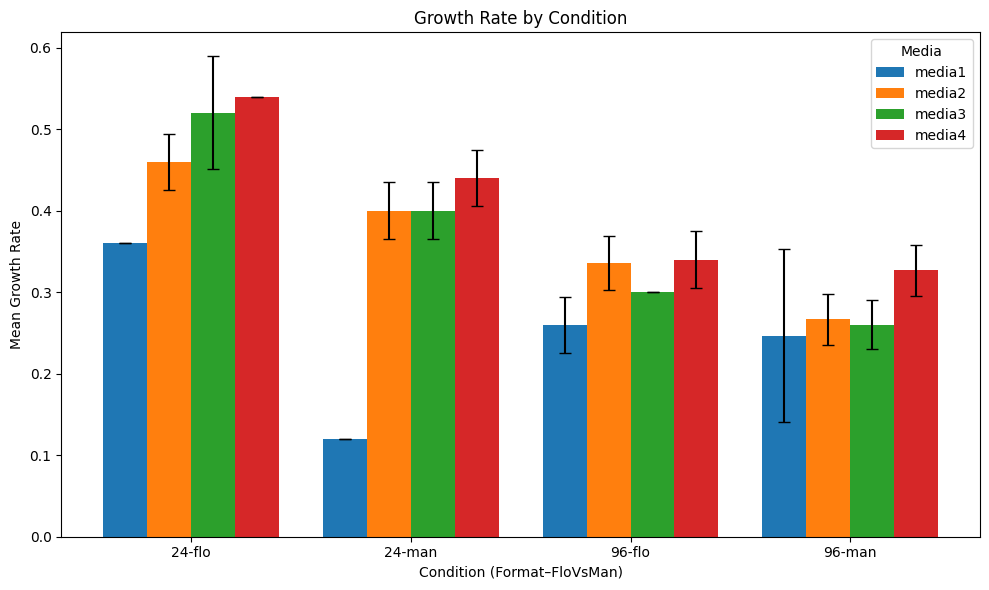

In [5]:
# Make sure std + Condition exist
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

conds  = summary_stats['Condition'].unique()
medias = summary_stats['Media'].unique()

x = np.arange(len(conds))        # positions for conditions
width = 0.8 / len(medias)        # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media]
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"{media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, conds)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("Mean Growth Rate")
plt.title("Growth Rate by Condition")
plt.legend(title="Media")
plt.tight_layout()
plt.show()


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# Two-way ANOVA with Media as a blocking factor
model = ols("GrowthRate ~ C(Format) * C(FloVsMan) + C(Media)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Mixed-effects model (Media as random effect)
import statsmodels.formula.api as smf
mixed = smf.mixedlm("GrowthRate ~ C(Format) * C(FloVsMan)", data=df, groups=df["Media"])
mixed_res = mixed.fit()
print(mixed_res.summary())


                         sum_sq    df          F        PR(>F)
C(Format)              0.166816   1.0  41.435325  1.519886e-08
C(FloVsMan)            0.081860   1.0  20.333048  2.685567e-05
C(Media)               0.174648   3.0  14.460231  2.306738e-07
C(Format):C(FloVsMan)  0.032822   1.0   8.152738  5.718437e-03
Residual               0.269738  67.0        NaN           NaN
                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        GrowthRate
No. Observations:        74             Method:                    REML      
No. Groups:              4              Scale:                     0.0040    
Min. group size:         18             Log-Likelihood:            84.0651   
Max. group size:         20             Converged:                 Yes       
Mean group size:         18.5                                                
-----------------------------------------------------------------------------
                  

c:\Users\uqkmuroi\gitcode\Yarrowia_media_optimizer\venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.stripplot(


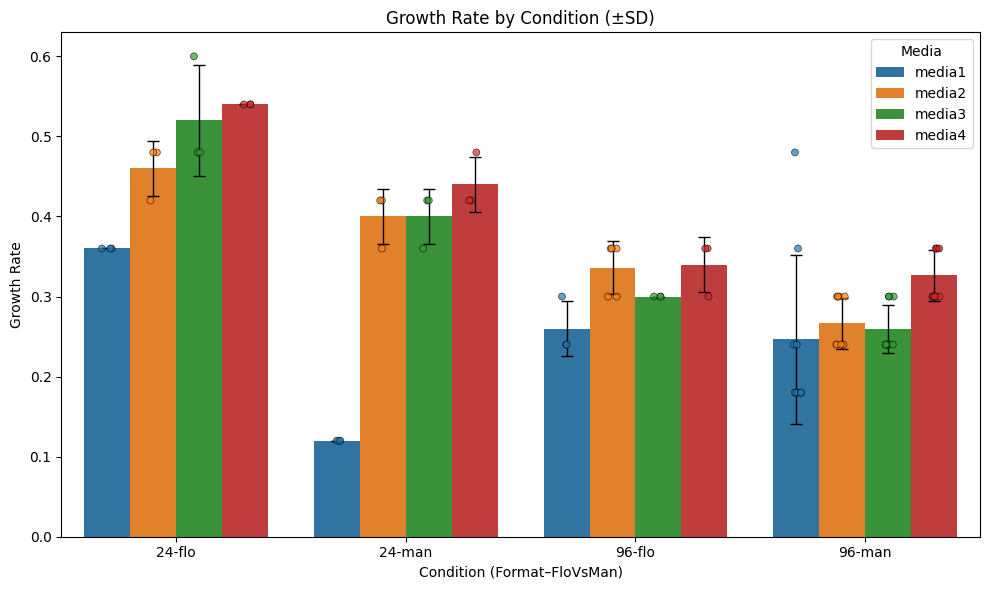

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(
C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_6276\930209021.py:46: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.stripplot(


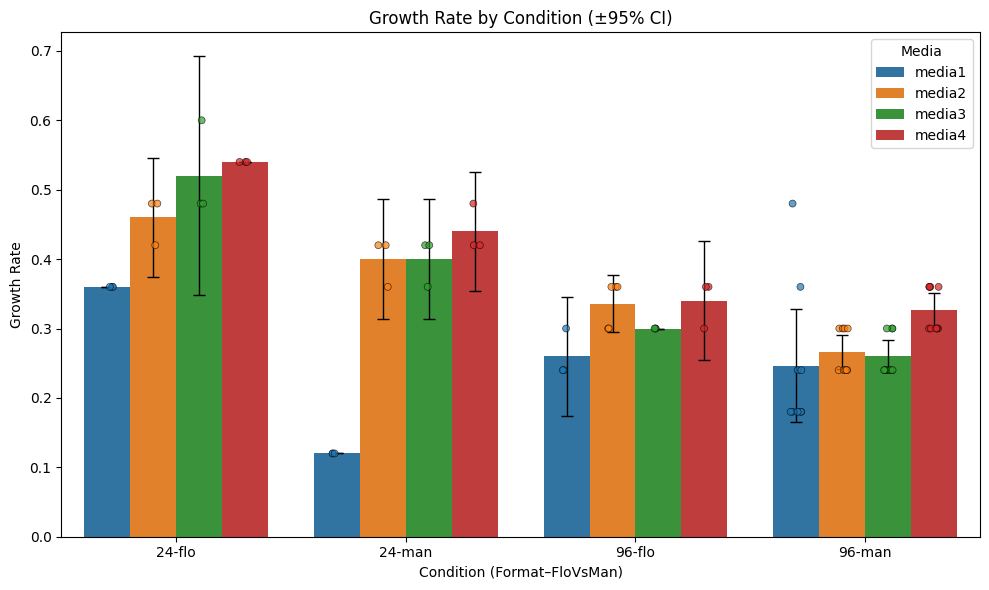

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# --- Compute summary stats ---
stats_sd = df.groupby(['Format', 'FloVsMan', 'Media']).agg(
    mean=('GrowthRate','mean'),
    std=('GrowthRate','std')
).reset_index()

stats_ci = df.groupby(['Format', 'FloVsMan', 'Media']).agg(
    mean=('GrowthRate','mean'),
    n=('GrowthRate','count'),
    std=('GrowthRate','std')
).reset_index()
stats_ci['sem'] = stats_ci['std'] / np.sqrt(stats_ci['n'])
stats_ci['ci95'] = stats_ci['sem'] * st.t.ppf(0.975, stats_ci['n']-1)

for stats, err_col, err_label, title in [
    (stats_sd, 'std', 'SD', "Growth Rate by Condition (±SD)"),
    (stats_ci, 'ci95', '95% CI', "Growth Rate by Condition (±95% CI)")
]:
    stats['Condition'] = stats['Format'].astype(str) + "-" + stats['FloVsMan']

    plt.figure(figsize=(10,6))
    palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Bars
    sns.barplot(
        data=stats,
        x='Condition', y='mean', hue='Media',
        capsize=0.2, errwidth=1.5, palette=palette,
        ci=None
    )

    # Error bars
    for i, row in stats.iterrows():
        xpos = list(stats['Condition'].unique()).index(row['Condition'])
        offset = list(stats['Media'].unique()).index(row['Media'])
        xpos = xpos + (offset - (len(stats['Media'].unique())-1)/2) * 0.8/len(stats['Media'].unique())
        plt.errorbar(x=xpos, y=row['mean'],
                     yerr=row[err_col], fmt='none', c='black', capsize=4, lw=1)

    # Raw replicate points with black outline
    sns.stripplot(
        data=df,
        x=df['Format'].astype(str) + "-" + df['FloVsMan'],
        y='GrowthRate', hue='Media',
        dodge=True, jitter=True, alpha=0.7,
        palette=palette, edgecolor='black', linewidth=0.5
    )

    # Clean legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:len(stats['Media'].unique())],
               labels[:len(stats['Media'].unique())],
               title="Media")

    plt.xlabel("Condition (Format–FloVsMan)")
    plt.ylabel("Growth Rate")
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [10]:
import numpy as np
import pandas as pd
import itertools
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import t

def condition_label(s):
    return f"{s['Format'].iloc[0]}-{s['FloVsMan'].iloc[0]}"

def one_way_stats(sub):
    # ANOVA: GrowthRate ~ C(Media)
    model = ols("GrowthRate ~ C(Media)", data=sub).fit()
    aov = sm.stats.anova_lm(model, typ=2)
    # Extract terms
    ss_between = aov.loc['C(Media)', 'sum_sq']
    df_between = aov.loc['C(Media)', 'df']
    ss_within  = aov.loc['Residual', 'sum_sq']
    df_within  = aov.loc['Residual', 'df']
    ms_between = ss_between / df_between
    ms_within  = ss_within  / df_within
    snr = ms_between / ms_within if ms_within > 0 else np.inf
    eta2 = ss_between / (ss_between + ss_within) if (ss_between + ss_within) > 0 else np.nan
    sigma = np.sqrt(ms_within)

    # Cohen's d between best and 2nd best media (by mean)
    gmeans = sub.groupby('Media')['GrowthRate'].agg(['mean','var','count']).reset_index()
    gmeans = gmeans.sort_values('mean', ascending=False)
    if len(gmeans) >= 2:
        m1, v1, n1 = gmeans.iloc[0][['mean','var','count']]
        m2, v2, n2 = gmeans.iloc[1][['mean','var','count']]
        sp = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1+n2-2)) if (n1+n2-2)>0 else np.nan
        cohend_top2 = (m1 - m2) / sp if sp and sp>0 else np.nan
        top2_gap = m1 - m2
        top2_names = (gmeans.iloc[0]['Media'], gmeans.iloc[1]['Media'])
    else:
        cohend_top2, top2_gap, top2_names = np.nan, np.nan, (np.nan, np.nan)

    return {
        'snr_media': snr,
        'eta2_media': eta2,
        'resid_sd': sigma,
        'cohend_top2': cohend_top2,
        'top2_gap': top2_gap,
        'top_media': top2_names[0],
        'second_media': top2_names[1],
        'k_media': sub['Media'].nunique(),
        'n_total': len(sub)
    }

def mde_two_sample_equal_n(sigma, n_per_group, alpha=0.05, power=0.8):
    # Two-sided t-test, equal n, common SD = sigma
    # delta = (z_{1-alpha/2}+z_{power})*sigma*sqrt(2/n)  (use t crits approx.)
    df = 2*n_per_group - 2
    t_alpha = t.ppf(1 - alpha/2, df)
    t_beta  = t.ppf(power, df)  # already positive for power (since it's a quantile)
    return (t_alpha + t_beta) * sigma * np.sqrt(2 / n_per_group)

rows = []
for (fmt, how), sub in df.groupby(['Format','FloVsMan']):
    stats = one_way_stats(sub)
    stats.update({'Condition': f"{fmt}-{how}"})
    # Plan different replicate counts to guide design:
    for nplan in [2, 3, 4, 5]:
        stats[f'MDE_n{nplan}'] = mde_two_sample_equal_n(stats['resid_sd'], nplan)
    rows.append(stats)

signal_table = pd.DataFrame(rows)[[
    'Condition','snr_media','eta2_media','resid_sd','cohend_top2','top2_gap','top_media','second_media',
    'k_media','n_total','MDE_n2','MDE_n3','MDE_n4','MDE_n5'
]].sort_values('Condition')

print(signal_table.to_string(index=False))


Condition  snr_media  eta2_media  resid_sd  cohend_top2  top2_gap top_media second_media  k_media  n_total   MDE_n2   MDE_n3   MDE_n4   MDE_n5
   24-flo  13.066667    0.830508  0.038730     0.408248     0.020    media4       media3        4       12 0.207720 0.117555 0.091815 0.078259
   24-man  72.888889    0.964706  0.030000     1.154701     0.040    media4       media2        4       12 0.160899 0.091058 0.071120 0.060619
   96-flo   5.031328    0.601498  0.030199     0.119523     0.004    media4       media2        4       14 0.161968 0.091663 0.071592 0.061022
   96-man   3.205674    0.231084  0.059372     1.897367     0.060    media4       media2        4       36 0.318429 0.180208 0.140750 0.119968


Data preview:
         Identifier  μ_max      t_D        λ      ∆Y   y_max  t(μ_max)  \
0  A1_96_flo_media1  0.005  150.869  651.946  10.699  10.610     915.5   
1  A2_96_flo_media1  0.004  156.756  615.715  11.202  11.130     885.5   
2  A3_96_flo_media1  0.004  154.509  505.987   7.981   7.875     795.5   
3  A4_96_flo_media2  0.005  132.971  527.391  10.115  10.024     825.5   
4  A5_96_flo_media2  0.005  135.753  497.505   9.758   9.653     825.5   

   GrowthRate WellPlate Format FloVsMan   Media  
0        0.30        A1     96      flo  media1  
1        0.24        A2     96      flo  media1  
2        0.24        A3     96      flo  media1  
3        0.30        A4     96      flo  media2  
4        0.30        A5     96      flo  media2  

Counts per Format × FloVsMan × Media:
Media            media1  media2  media3  media4
Format FloVsMan                                
24     flo            3       3       3       3
       man            3       3       3       3
96     flo

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_16656\2304254424.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Format','FloVsMan','Media']).size().unstack(fill_value=0))


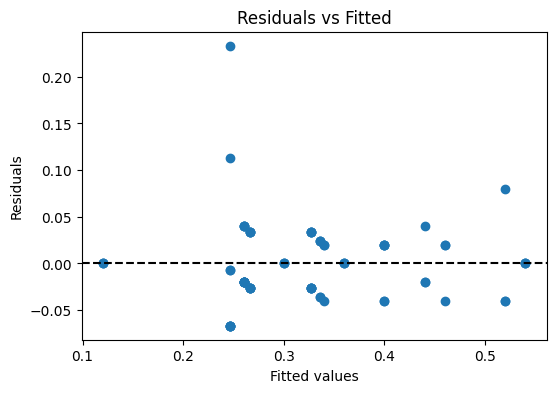

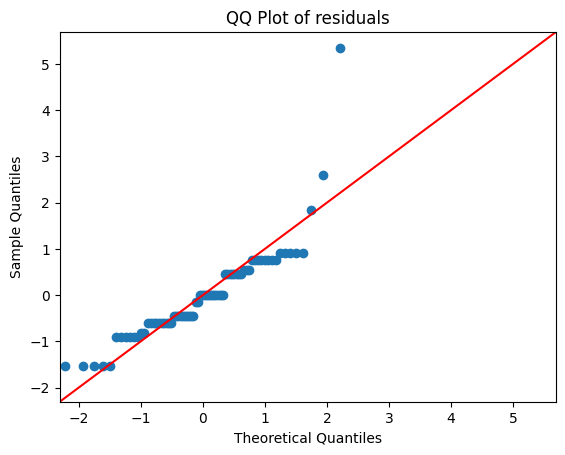


Shapiro-Wilk normality test p = 8.135868151712726e-08
Levene’s homogeneity test p = 0.8004691353800073


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_16656\2304254424.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['GrowthRate'].values for _, g in df.groupby(['Format','FloVsMan','Media'])]



=== Tukey HSD Results ===
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
24-flo-media1 24-flo-media2      0.1 0.4974 -0.0442  0.2442  False
24-flo-media1 24-flo-media3     0.16 0.0164  0.0158  0.3042   True
24-flo-media1 24-flo-media4     0.18 0.0035  0.0358  0.3242   True
24-flo-media1 24-man-media1    -0.24    0.0 -0.3842 -0.0958   True
24-flo-media1 24-man-media2     0.04 0.9997 -0.1042  0.1842  False
24-flo-media1 24-man-media3     0.04 0.9997 -0.1042  0.1842  False
24-flo-media1 24-man-media4     0.08 0.8225 -0.0642  0.2242  False
24-flo-media1 96-flo-media1     -0.1 0.4974 -0.2442  0.0442  False
24-flo-media1 96-flo-media2   -0.024    1.0  -0.153   0.105  False
24-flo-media1 96-flo-media3    -0.06 0.9794 -0.2042  0.0842  False
24-flo-media1 96-flo-media4    -0.02    1.0 -0.1642  0.1242  False
24-flo-media1 96-man-media1  -0.113

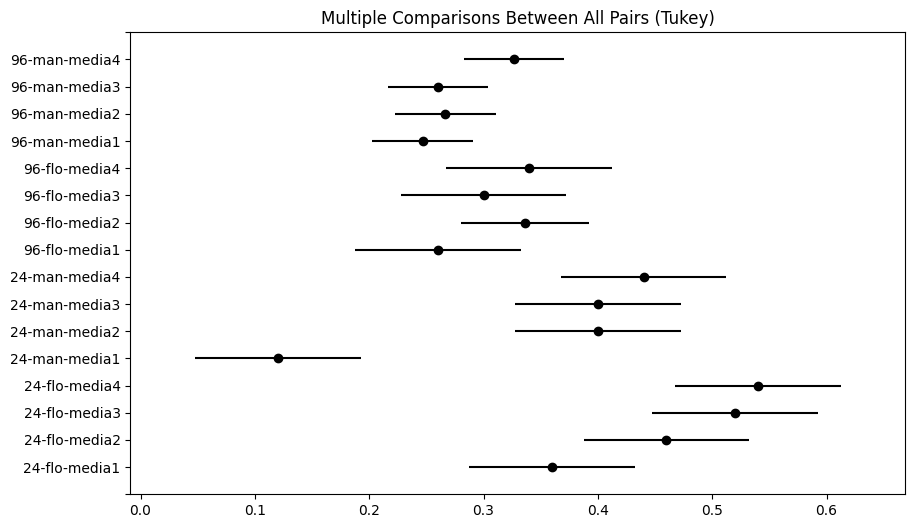

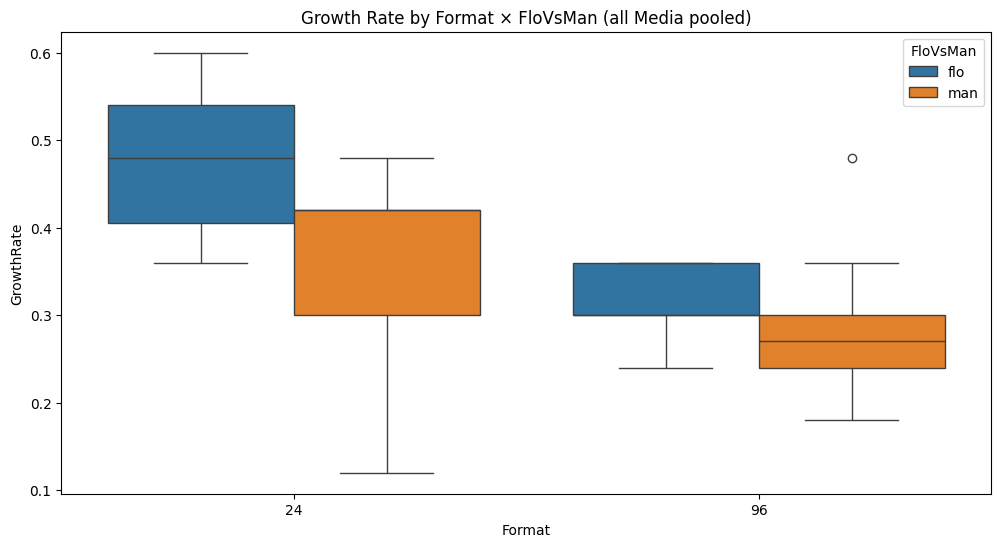

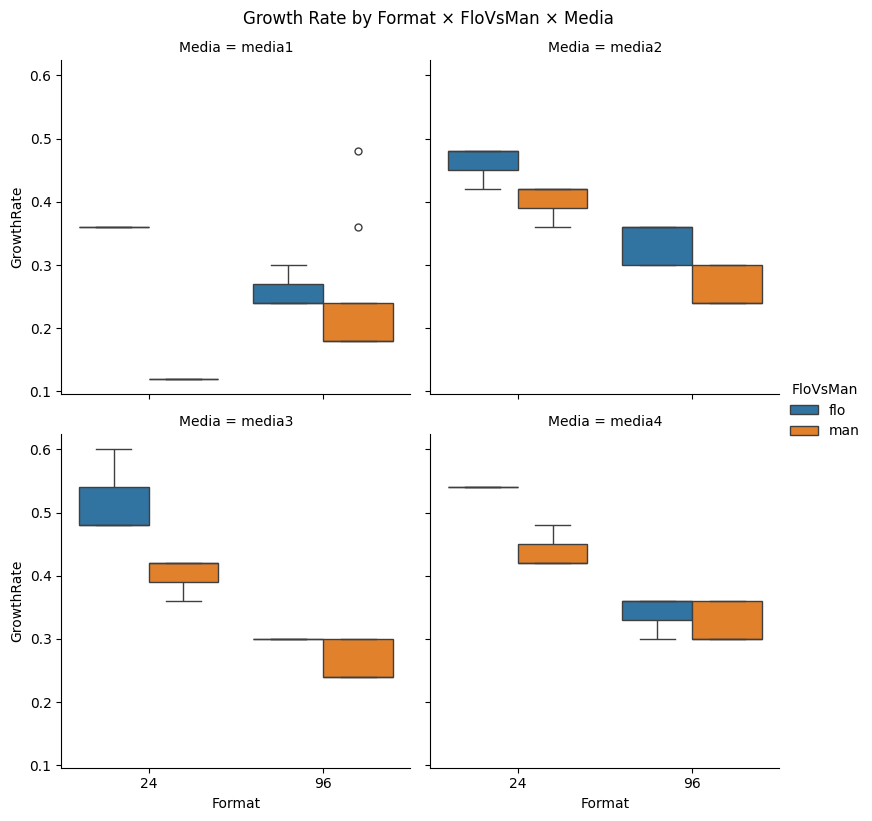

In [25]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

# --- LOAD DATA ---
path = "data/GrowthProfilerNonParametricResults.csv"
df = pd.read_csv(path)
# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]
# --- CLEAN CATEGORICALS ---
for col in ['Format','FloVsMan','Media']:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category')

print("Data preview:")
print(df.head())

# --- GROUP COUNTS ---
print("\nCounts per Format × FloVsMan × Media:")
print(df.groupby(['Format','FloVsMan','Media']).size().unstack(fill_value=0))

# --- THREE-WAY ANOVA ---
model = smf.ols('GrowthRate ~ C(Format) * C(FloVsMan) * C(Media)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)   # Type III ANOVA for unbalanced
print("\n=== Type III ANOVA Results ===")
print(anova_table)

# --- MODEL SUMMARY (coeffs, R^2) ---
print("\n=== Model Summary ===")
print(model.summary())

# --- ASSUMPTION CHECKS ---
resid = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

sm.qqplot(resid, line='45', fit=True)
plt.title("QQ Plot of residuals")
plt.show()

print("\nShapiro-Wilk normality test p =", stats.shapiro(resid).pvalue)
groups = [g['GrowthRate'].values for _, g in df.groupby(['Format','FloVsMan','Media'])]
print("Levene’s homogeneity test p =", stats.levene(*groups).pvalue)

# --- POST-HOC TUKEY TEST ---
# Compare all Condition combinations (Format-FloVsMan-Media collapsed)
df['Condition'] = df['Format'].astype(str) + "-" + df['FloVsMan'].astype(str) + "-" + df['Media'].astype(str)
tukey = pairwise_tukeyhsd(endog=df['GrowthRate'], groups=df['Condition'], alpha=0.05)
print("\n=== Tukey HSD Results ===")
print(tukey)
tukey.plot_simultaneous()
plt.show()

# --- PLOTS ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Format", y="GrowthRate", hue="FloVsMan")
plt.title("Growth Rate by Format × FloVsMan (all Media pooled)")
plt.show()

g = sns.catplot(data=df, x="Format", y="GrowthRate", hue="FloVsMan", col="Media",
                kind="box", col_wrap=2, height=4)
g.fig.suptitle("Growth Rate by Format × FloVsMan × Media", y=1.02)
plt.show()


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA model with interactions
model = ols('GrowthRate ~ C(Format) * C(FloVsMan) * C(Media)', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)  # Type II sums of squares
print(anova_table)


                                  sum_sq    df          F        PR(>F)
C(Format)                       0.165984   1.0  68.219108  2.253152e-11
C(FloVsMan)                     0.083253   1.0  34.216921  2.409987e-07
C(Media)                        0.174648   3.0  23.926635  3.332243e-10
C(Format):C(FloVsMan)           0.031872   1.0  13.099118  6.213157e-04
C(Format):C(Media)              0.099719   3.0  13.661372  7.510227e-07
C(FloVsMan):C(Media)            0.005922   3.0   0.811278  4.927991e-01
C(Format):C(FloVsMan):C(Media)  0.026978   3.0   3.695908  1.669553e-02
Residual                        0.141120  58.0        NaN           NaN


In [27]:
import statsmodels.formula.api as smf

# Mixed-effects model (replicates are not explicit, so treat Media as fixed)
mixed = smf.mixedlm("GrowthRate ~ C(Format) * C(FloVsMan) * C(Media)",
                    data=df,
                    groups=df["Media"]).fit()
print(mixed.summary())


                               Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               GrowthRate
No. Observations:                74                    Method:                           REML      
No. Groups:                      4                     Scale:                            0.0024    
Min. group size:                 18                    Log-Likelihood:                   80.9991   
Max. group size:                 20                    Converged:                        Yes       
Mean group size:                 18.5                                                              
---------------------------------------------------------------------------------------------------
                                                      Coef.    Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------
Intercept                      

c:\Users\uqkmuroi\gitcode\Yarrowia_media_optimizer\venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


   Format FloVsMan   Media         mean           var         std
0      24      flo  media1   403.141333    705.756302   26.566074
1      24      flo  media2   289.262667    155.565205   12.472578
2      24      flo  media3   266.484667    535.010522   23.130294
3      24      flo  media4   149.239000    108.719821   10.426880
4      24      man  media1  2569.964333    681.082969   26.097566
5      24      man  media2   161.038000      5.001484    2.236400
6      24      man  media3   275.055333      9.836470    3.136315
7      24      man  media4   166.755667     20.785246    4.559084
8      96      flo  media1   591.216000   5776.158171   76.001041
9      96      flo  media2   441.272200   4349.439753   65.950282
10     96      flo  media3   387.475667   3639.815465   60.330883
11     96      flo  media4   328.297667   2490.377316   49.903680
12     96      man  media1  3023.178333  11189.956341  105.782590
13     96      man  media2   150.407333   1719.959738   41.472397
14     96 

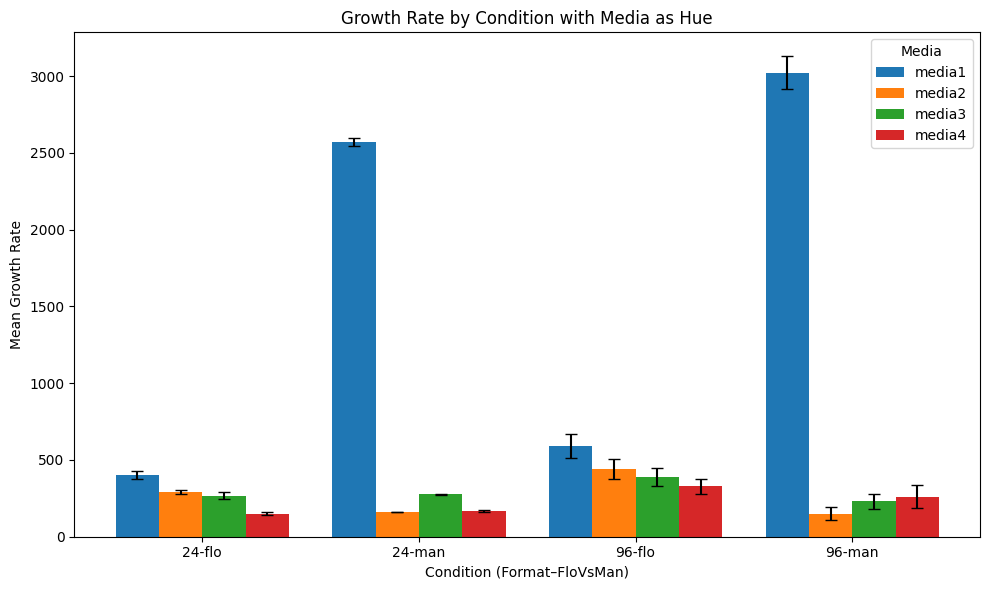

In [ ]:
# Load the csv file
df=pd.read_csv(path)

# split the 'Identifier' column into new columns

# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]


# Group by Format, FlowType, and Media and calculate mean and variance of GrowthRate
summary_stats = df.groupby(['Format', 'FloVsMan', 'Media'])['λ'].agg(['mean', 'var']).reset_index()
summary_stats['std'] = np.sqrt(summary_stats['var'])

# Display the summary statistics
print(summary_stats)
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

conds  = summary_stats['Condition'].unique()
medias = summary_stats['Media'].unique()

x = np.arange(len(conds))        # positions for conditions
width = 0.8 / len(medias)        # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media]
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"{media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, conds)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("Lag Phase Duration (λ)")
plt.title("Lag Phase Duration by Condition with Media as Hue")
plt.legend(title="Media")
plt.tight_layout()
plt.show()

   Format FloVsMan   Media       mean       var       std
0      24      flo  media1   3.534667  0.000760  0.027574
1      24      flo  media2   4.545000  0.105811  0.325286
2      24      flo  media3   4.534667  0.016142  0.127052
3      24      flo  media4   4.438000  0.167323  0.409051
4      24      man  media1   4.305667  0.004900  0.070002
5      24      man  media2   7.044000  0.679783  0.824490
6      24      man  media3   4.277000  0.017383  0.131845
7      24      man  media4   5.693667  0.010162  0.100808
8      96      flo  media1   9.871667  3.057608  1.748602
9      96      flo  media2  10.179600  0.136124  0.368950
10     96      flo  media3  10.232667  0.406576  0.637633
11     96      flo  media4  10.178333  0.633221  0.795752
12     96      man  media1   5.494333  0.221527  0.470667
13     96      man  media2  10.335444  0.407966  0.638722
14     96      man  media3   8.463444  0.980615  0.990260
15     96      man  media4   9.589111  0.950074  0.974717


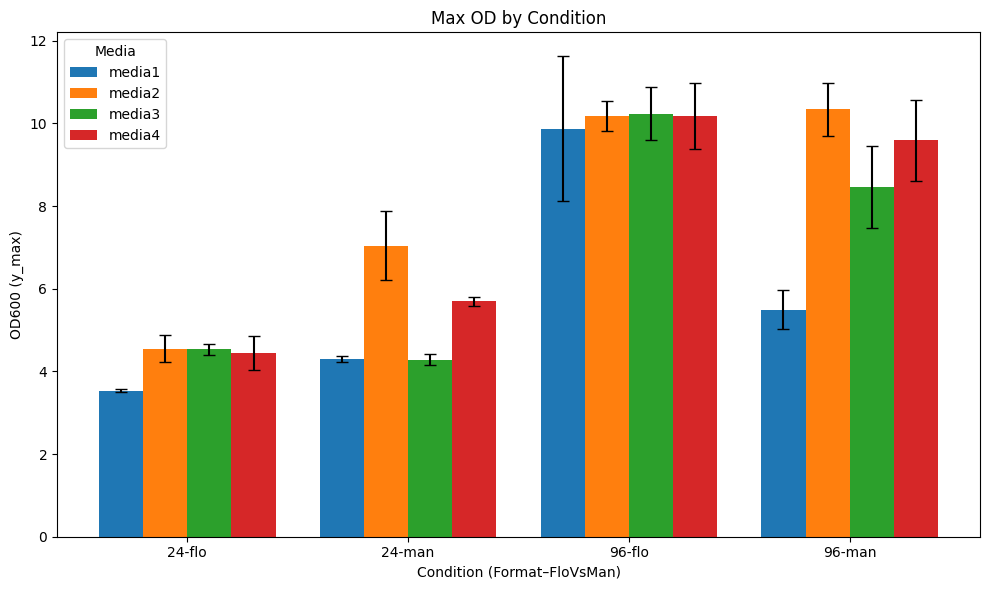

In [32]:
# Load the csv file
df=pd.read_csv(path)

# split the 'Identifier' column into new columns

# Split the 'Identifier' column into new columns
identifier_split = df['Identifier'].str.split('_', expand=True)
df['WellPlate'] = identifier_split[0]
df['Format'] = identifier_split[1]
df['FloVsMan'] = identifier_split[2]
df['Media'] = identifier_split[3]


# Group by Format, FlowType, and Media and calculate mean and variance of GrowthRate
summary_stats = df.groupby(['Format', 'FloVsMan', 'Media'])['y_max'].agg(['mean', 'var']).reset_index()
summary_stats['std'] = np.sqrt(summary_stats['var'])

# Display the summary statistics
print(summary_stats)
summary_stats['Condition'] = summary_stats['Format'].astype(str) + "-" + summary_stats['FloVsMan']

conds  = summary_stats['Condition'].unique()
medias = summary_stats['Media'].unique()

x = np.arange(len(conds))        # positions for conditions
width = 0.8 / len(medias)        # distribute bars within each group

plt.figure(figsize=(10,6))
for i, media in enumerate(medias):
    sub = summary_stats[summary_stats['Media']==media]
    plt.bar(
        x + i*width, 
        sub['mean'], 
        width, 
        label=f"{media}", 
        yerr=sub['std'], 
        capsize=4
    )

plt.xticks(x + width*(len(medias)-1)/2, conds)
plt.xlabel("Condition (Format–FloVsMan)")
plt.ylabel("OD600 (y_max)")
plt.title("Max OD by Condition")
plt.legend(title="Media")
plt.tight_layout()
plt.show()